# ASSIGNMENT 4 - GROUP PROJECT - Multi-Layer Perceptron

**Student 1:** s3623386 - Tran Thi Hong Phuong</br>
**Student 2:** s3595082 - Le Gia Bao

# Import Dataset

In [1]:
import os, skimage.io
import numpy as np

# Set random seed for reproducible results
from numpy.random import seed
seed(1)

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        
        file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory)]
        for f in file_names:
            # Open image and normalise within 0 and 1
            images.append(skimage.io.imread(f) / 255.)
            labels.append(int(d))
            
    return np.asarray(images), np.asarray(labels)

In [2]:
X, Y = load_data(os.path.join('MNIST', 'training'))
X_test, Y_test = load_data(os.path.join('MNIST', 'testing'))

print('X: ', X.shape)
print('Y: ', Y.shape)
print('X_test: ', X_test.shape)
print('Y_test: ', Y_test.shape)

X:  (60000, 28, 28)
Y:  (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Defintion of each label

In [3]:
labels_def = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

Sample plot

'T-shirt/top'

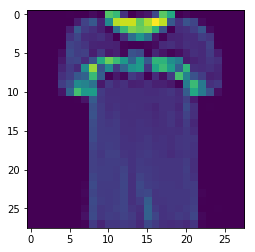

In [4]:
import matplotlib.pyplot as plt

# Plot one example for testing
plt.imshow(X[19])
labels_def[Y[19]]

Input flattening

In [5]:
num_pixels = X.shape[1] * X.shape[2]
X_flattened = X.reshape(X.shape[0], num_pixels).astype('float32')
X_test_flattened = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print('X_flattened:', X_flattened.shape)
print('X_test_flattend:', X_test_flattened.shape)

X_flattened: (60000, 784)
X_test_flattend: (10000, 784)


Convert target arrays to factors, so that targets have shape `(n_samples, n_classes)`

In [6]:
from keras.utils.np_utils import to_categorical

Y_cat = to_categorical(Y)
Y_test = to_categorical(Y_test)
num_classes = Y_cat.shape[1]

print('Y_cat:', Y_cat.shape)
print('Y_test:', Y_test.shape)
print('num_classes:', num_classes)

Using TensorFlow backend.


Y_cat: (60000, 10)
Y_test: (10000, 10)
num_classes: 10


# Single Split of Dataset

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_flattened, Y_cat, test_size=0.1, random_state=1)

print('X_train: ', X_train.shape)
print('Y_train: ', Y_train.shape)
print('X_val: ', X_val.shape)
print('Y_val: ', Y_val.shape)

X_train:  (54000, 784)
Y_train:  (54000, 10)
X_val:  (6000, 784)
Y_val:  (6000, 10)


In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

def run_model(n_nodes, X_train, Y_train, X_val, Y_val):
    # Building model
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10)
    
    # Evaluation
    train_score = model.evaluate(X_train, Y_train)
    val_score = model.evaluate(X_val, Y_val)
    print("\nMLP Accuracy on train set: %.2f%%" % (train_score[1]*100))
    print("\nMLP Accuracy on val set: %.2f%%" % (val_score[1]*100))
    
    return model, train_score, val_score

In [9]:
import pandas as pd

n_nodes = [78, 128, 256, 512, 784]

# Dataframe to store accuracy of each number of nodes
experiment_accuracy = pd.DataFrame(columns=['Accuracy'], index=n_nodes)
# Keep track of the configuration with best performance
best_single_val_acc = 0
best_n_nodes = 0

for n in n_nodes:
    print('\n-----n_nodes = {}-----'.format(n))
    # Retrieve validation score for current number of nodes
    _, _, val_score = run_model(n_nodes=n, X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val)
    # Save results
    experiment_accuracy.loc[n] = val_score[1]
    if val_score[1] > best_single_val_acc:
        best_single_val_acc = val_score[1]
        best_n_nodes = n


-----n_nodes = 78-----
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 11s 213us/step - loss: 0.5241 - acc: 0.8161 - val_loss: 0.4096 - val_acc: 0.8392
Epoch 2/10
54000/54000 [==============================] - 7s 124us/step - loss: 0.3965 - acc: 0.8596 - val_loss: 0.3643 - val_acc: 0.8632
Epoch 3/10
54000/54000 [==============================] - 7s 125us/step - loss: 0.3576 - acc: 0.8696 - val_loss: 0.3526 - val_acc: 0.8705
Epoch 4/10
54000/54000 [==============================] - 7s 125us/step - loss: 0.3296 - acc: 0.8799 - val_loss: 0.3534 - val_acc: 0.8703
Epoch 5/10
54000/54000 [==============================] - 7s 125us/step - loss: 0.3123 - acc: 0.8863 - val_loss: 0.3336 - val_acc: 0.8768
Epoch 6/10
54000/54000 [==============================] - 7s 125us/step - loss: 0.2981 - acc: 0.8909 - val_loss: 0.3109 - val_acc: 0.8877
Epoch 7/10
54000/54000 [==============================] - 7s 125us/step - loss: 0.2853 - acc: 0.89

Accuracy over number of nodes and the number of nodes that gives best performance

Best n_nodes: 784


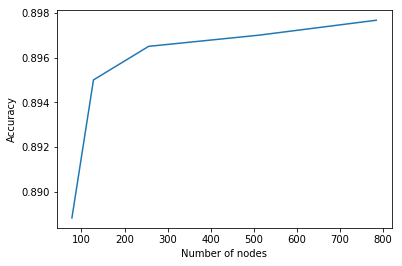

In [29]:
print('Best n_nodes:', best_n_nodes)

fig, ax = plt.subplots()
plt.plot(experiment_accuracy)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Accuracy')
plt.show()

# K-Fold Cross Validation

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Index for logging
fold = 0
# Placeholders for results
kf_val_scores = []
best_val_score = 0
best_model = None

for train_index, val_index in kf.split(X_flattened):
    print('\n-----Fold {}-----'.format(fold + 1))
    
    # Get training and validation split
    X_train = X_flattened[train_index]
    Y_train = Y_cat[train_index]
    X_val = X_flattened[val_index]
    Y_val = Y_cat[val_index]
    
    # Run model and retrieve train scores and validation scores
    model, train_score, val_score = run_model(n_nodes=784, X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val)
    
    # Keep track of best model
    if val_score[1] > best_val_score:
        best_val_score = val_score[1]
        best_model = model
        
    # Save results for plotting
    kf_val_scores.append(val_score[1])
    fold += 1


-----Fold 1-----
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 221us/step - loss: 0.4930 - acc: 0.8231 - val_loss: 0.4042 - val_acc: 0.8481
Epoch 2/10
48000/48000 [==============================] - 10s 201us/step - loss: 0.3715 - acc: 0.8631 - val_loss: 0.3865 - val_acc: 0.8552
Epoch 3/10
48000/48000 [==============================] - 10s 200us/step - loss: 0.3334 - acc: 0.8780 - val_loss: 0.3242 - val_acc: 0.8779
Epoch 4/10
48000/48000 [==============================] - 10s 199us/step - loss: 0.3094 - acc: 0.8857 - val_loss: 0.3102 - val_acc: 0.8881
Epoch 5/10
48000/48000 [==============================] - 10s 202us/step - loss: 0.2874 - acc: 0.8936 - val_loss: 0.3158 - val_acc: 0.8858
Epoch 6/10
48000/48000 [==============================] - 10s 200us/step - loss: 0.2702 - acc: 0.9001 - val_loss: 0.3075 - val_acc: 0.8842
Epoch 7/10
48000/48000 [==============================] - 9s 197us/step - loss: 0.2599 - acc: 0.90

Evaluate best model found

10000/10000 [==============================] - 1s 58us/step
Best K-Fold val accuracy: 0.8963333333333333
Test accuracy: 0.8892


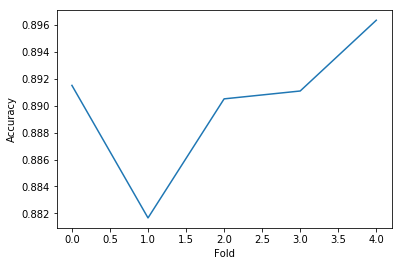

In [26]:
test_scores = best_model.evaluate(X_test_flattened, Y_test)
print('Best K-Fold val accuracy:', best_val_score)
print('Test accuracy:', test_scores[1])

fig, ax = plt.subplots()
plt.plot(kf_val_scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
plt.show()